# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Phạm Phú Toàn  
- MSSV: 21127183    
- Lớp: 21CLC08

# Import

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression



# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [22]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)
 
# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [23]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X. T@ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y
        return self

    def get_params(self):
        return self.w

    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)

def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel())) 

k_validation = KFold(n_splits=5)
LR = LinearRegression(fit_intercept=False) 

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [24]:
# Phần code cho yêu cầu 1a
X1a_train = train.iloc[:,:11]
Y1a_train = train.iloc[:,-1]
X1a_test = test.iloc[:,:11]
Y1a_test = test.iloc[:,-1]

lr = OLSLinearRegression().fit(X1a_train, Y1a_train)
Y1a_predict = lr.predict(X1a_test)


train = train.sample(frac= 1)
temp_s = cross_val_score(LR,train.iloc[:,:11], train.iloc[:,-1],cv =k_validation, scoring='neg_mean_absolute_error')
sc = abs(sum(temp_s) /len(temp_s))
print(sc)

113261.50533724276


In [25]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
mae1a = mae(Y1a_test,Y1a_predict)
print(round(mae1a,3))

104863.778


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

In [26]:
s = ''
par = lr.get_params()
columns = train.columns[:11]
for i in range(len(par)):
    par[i] = round(par[i],3)
    s += f"{par[i]}" + ' x ' + columns[i] + ' + '

s= s.strip(" + ")
print("salary = " + s)

salary = -22756.513 x Gender + 804.503 x 10percentage + 1294.655 x 12percentage + -91781.898 x CollegeTier + 23182.389 x Degree + 1437.549 x collegeGPA + -8570.662 x CollegeCityTier + 147.858 x English + 152.888 x Logical + 117.222 x Quant + 34552.286 x Domain


# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [27]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# trộn tập dữ liệu 
train_1b = train.sample(frac= 1)

# lấy 5 đặc trưng 
# cons = train_1b.iloc[:,18]
# argee = train_1b.iloc[:,19]
# extra = train_1b.iloc[:,20]
# nuer = train_1b.iloc[:,21]
# ope = train_1b.iloc[:,22]

vali_score = []
for i in range(5):

    temp_s = cross_val_score(LR,train_1b.iloc[:,18+i:18+i+1], train_1b.iloc[:,-1],cv =k_validation, scoring='neg_mean_absolute_error')
    sc = abs(sum(temp_s) /len(temp_s))
    vali_score.append(sc)

data = {
        'Đặc trung' :['conscientiousness', 'agreeableness ', 'extraversion ', 'neuroticism','openness_to_experience'],
        'MAE':[x for x in vali_score]
        }

df = pd.DataFrame(data)

df.sort_values(by=['MAE'])



,Đặc trung,MAE
3,neuroticism,299339.466405
1,agreeableness,300692.731153
4,openness_to_experience,302910.446370
0,conscientiousness,305992.514150
2,extraversion,306950.050971


In [28]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
print("best_personality_feature_model là: nureoticism")

X1b_train = train.iloc[:,21:22]
X1b_test = test.iloc[:,21:22]

lr1b = OLSLinearRegression().fit(X1b_train, y_train)
Y1b_predict = lr1b.predict(X1b_test)


best_personality_feature_model là: nureoticism


In [29]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
mae1b = mae(y_test,Y1b_predict)
print(round(mae1b,3))

291019.693


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

In [30]:

print("Salary = " + f"{round(lr1b.get_params()[0],3)}" + " x neuroticism")

Salary = -56546.304 x neuroticism


# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [31]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# trộn tập dữ liệu
train_1c = train.sample(frac= 1)

# lấy 3 đặc trưng 
# English: 7
# logical: 8
# quant: 9

vali_score = []
for i in range(3):


    temp_s = cross_val_score(LR,train_1c.iloc[:,7+i:7+i+1], train_1c.iloc[:,-1],cv =k_validation, scoring='neg_mean_absolute_error')
    sc = abs(sum(temp_s) /len(temp_s))
    vali_score.append(sc)

data = {
        'Đặc trưng' :['English','Logical','Quant'],
        'MAE':[x for x in vali_score]
        }

df = pd.DataFrame(data)
df.sort_values(by=['MAE'])

,Đặc trưng,MAE
2,Quant,118207.917099
1,Logical,120352.713687
0,English,121945.176435


In [32]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
print("best_personality_feature_model là: Quant")

X1c_train = train.iloc[:,9:10]
X1c_test = test.iloc[:,9:10]

lr1c = OLSLinearRegression().fit(X1c_train, y_train)
Y1c_predict = lr1c.predict(X1c_test)


best_personality_feature_model là: Quant


In [33]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
mae1c = mae(y_test,Y1c_predict)
print(round(mae1c,3))

106819.578


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

In [34]:
print("Salary = " + f"{round(lr1c.get_params()[0],3)}" + " x Quant")

Salary = 585.895 x Quant


# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

<Axes: >

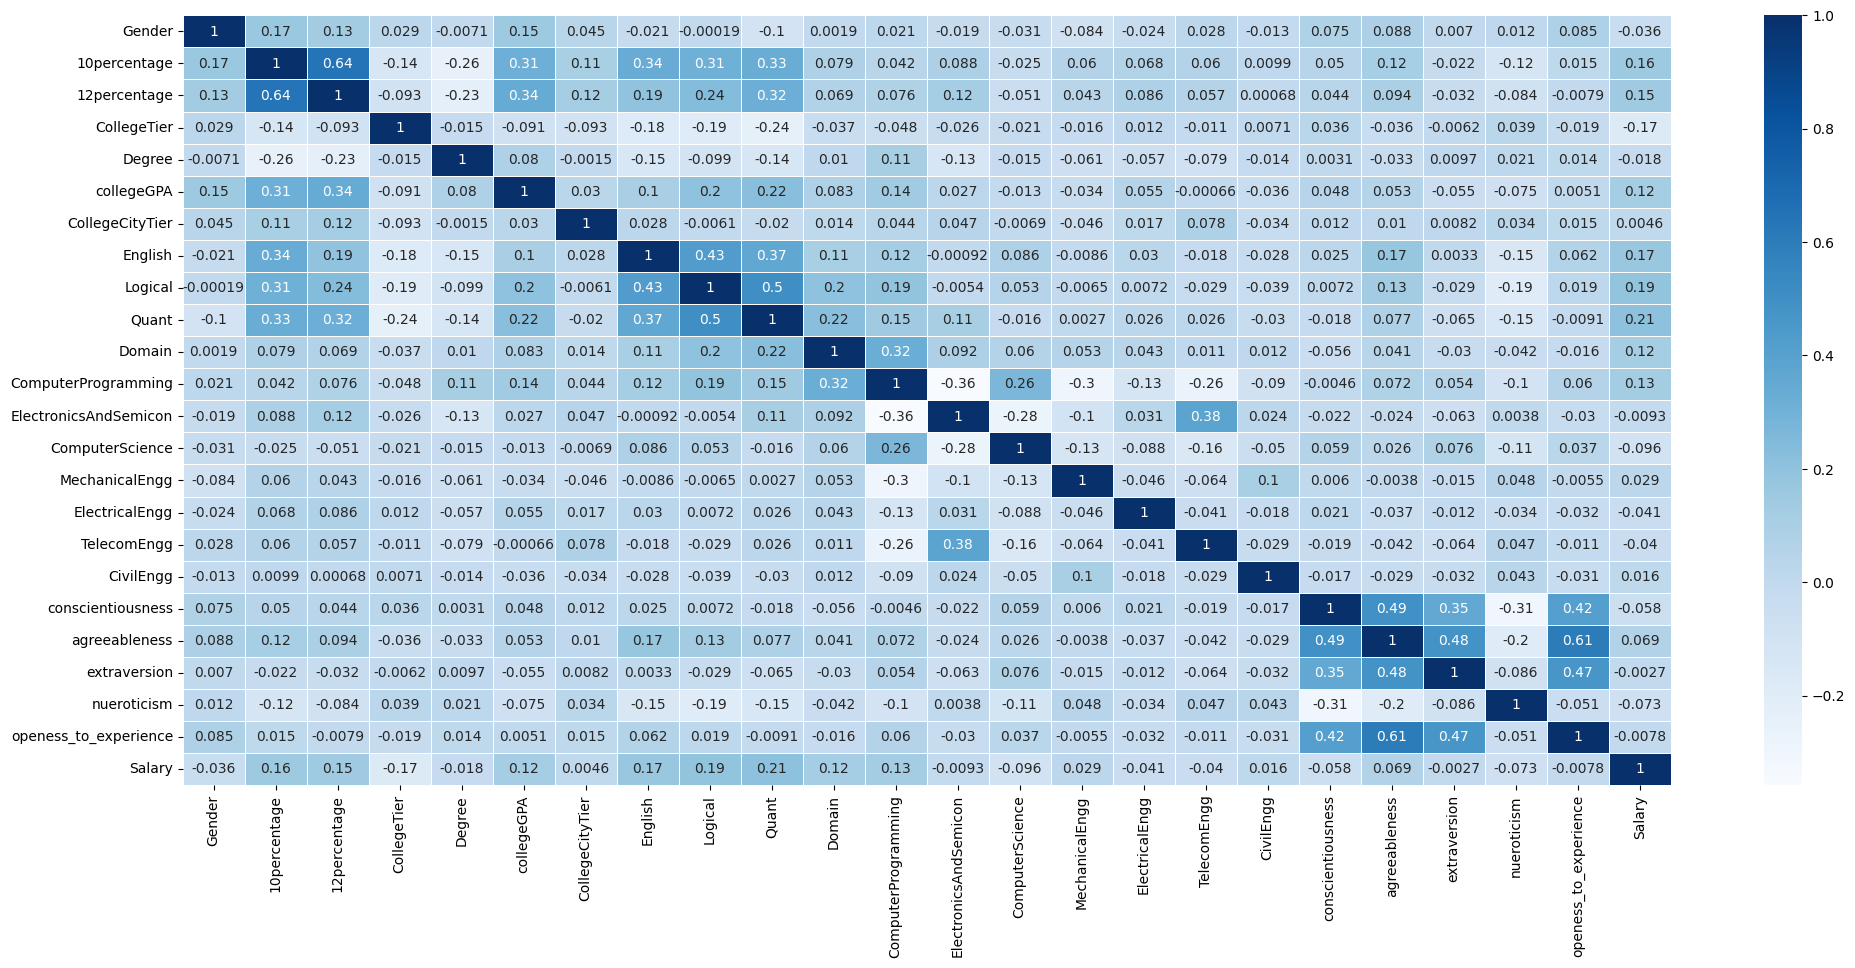

In [35]:
# Trình bày các phần tìm ra mô hình
corr_matrix = train.corr()
fig, axis = plt.subplots(figsize=(24, 10))
sns.heatmap(corr_matrix,cmap="Blues", annot=True, linewidths=.5, ax = axis)

Em sử dụng thư viện seaborn để biểu diễn tập data đã cho bằng heatmap, thể hiện mối quan hệ giữa các đặc trưng với nhau. Ta chỉ cần quan tâm cột cuối cùng trong bảng vì nó thể hiện mối quan hệ giữa mức lương "Salary" và các đặc trưng còn lại.

Theo em tìm hiểu thì các đặc trưng có quan hệ với nhau là các số có trị tuyệt càng gần 1 thì sẽ càng ảnh hưởng và liên quan mật thiết tới nhau. 
-> khi đó ta nên sử dụng các đặc trưng có quan hệ với Salary là các số có trị tuyệt càng gần 1 để xây dựng mô hình. 

Vậy với model 1 của em là mô hình được xây dựng với các đặc trưng có giá trị ở cột salary là dương, gồm 11 đặc trưng: 
'10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','MechanicalEngg','CivilEngg','agreeableness'

Model 2 của em sẽ được xây dựng với các đặc trưng có giá trị ở cột salary là âm, gồm 12 đặc trưng:
'Gender','CollegeTier','Degree','ElectronicsAndSemicon','ComputerScience','ElectricalEngg','TelecomEngg','conscientiousness','extraversion','nueroticism','openess_to_experience'

Sau khi thử nghiệm em thấy các đặc trưng dương là tốt hơn các đặc trưng âm, nên model cuối cùng của em sẽ xây dựng model 3 là mô hình chỉ gồm các đặc trưng có giá trị dương lớn hơn 0.1, gồm 8 đặc trưng:
'10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming'

Khi thử nghiệm em thấy model 3 và model 1 không khác nhau nhiều, nên em sẽ chọn lọc các đặc trưng dương (>=0.15) và các đặc trưng âm (<= -0.07) để tạo ra model 4, gồm 8 đặc trưng:
'10percentage','12percentage','CollegeTier','English','Logical','Quant','ComputerScience','nueroticism'

## Thử nghiệm, so sánh các mô hình

In [36]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

list_score = []


train_1d = train.sample(frac= 1)

Y1d_train = train_1d.iloc[:, -1]


# Mô hình 1: các đặc trưng toàn dương
model1 = train_1d.loc[:,['10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','MechanicalEngg','CivilEngg','agreeableness']]
x_model1_test = test.loc[:,['10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','MechanicalEngg','CivilEngg','agreeableness']]

temp_s = cross_val_score(LR,model1, Y1d_train,cv =k_validation, scoring='neg_mean_absolute_error')
score = abs(sum(temp_s)/len(temp_s))
list_score.append(score)

# Mô hình 2: các đặc trưng toàn âm
model2 = train_1d.loc[:,['Gender','CollegeTier','Degree','ElectronicsAndSemicon','ComputerScience','ElectricalEngg','TelecomEngg','conscientiousness','extraversion','nueroticism','openess_to_experience']]
x_model2_test = test.loc[:,['Gender','CollegeTier','Degree','ElectronicsAndSemicon','ComputerScience','ElectricalEngg','TelecomEngg','conscientiousness','extraversion','nueroticism','openess_to_experience']]

temp_s = cross_val_score(LR,model2, Y1d_train,cv =k_validation, scoring='neg_mean_absolute_error')
score = abs(sum(temp_s)/len(temp_s))
list_score.append(score)

#  Mô hình 3: các đặc trưng rất dương (>0.1 trên heatmap)
model3 = train_1d.loc[:,['10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming']]
x_model3_test = test.loc[:,['10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming']]

temp_s = cross_val_score(LR,model3, Y1d_train,cv =k_validation, scoring='neg_mean_absolute_error')
score = abs(sum(temp_s)/len(temp_s))
list_score.append(score)

#  Mô hình 4: các đặc trưng có trị tuyệt gần 1 (dương (>=0.15) và âm (<= -0.07))
model4 = train_1d.loc[:,['10percentage','12percentage','CollegeTier','English','Logical','Quant','ComputerScience','nueroticism']]
x_model4_test = test.loc[:,['10percentage','12percentage','CollegeTier','English','Logical','Quant','ComputerScience','nueroticism']]

temp_s = cross_val_score(LR,model4, Y1d_train,cv =k_validation, scoring='neg_mean_absolute_error')
score = abs(sum(temp_s)/len(temp_s))
list_score.append(score)

data = {
        'Model' :['model_1: dương','model_2: âm','model_3: rất dương(>0,1)', 'model 4: trị tuyệt gần 1'],
        'MAE':[x for x in list_score]
        }

df = pd.DataFrame(data)
df.sort_values(by=['MAE'])


,Model,MAE
3,model 4: trị tuyệt gần 1,112913.996194
2,"model_3: rất dương(>0,1)",114663.238491
0,model_1: dương,114787.951563
1,model_2: âm,131789.158340


Khi thử nghiệm model4 cho điểm tốt nhất, còn model 3 và model 1 cho điểm khá tương đồng nhau và sai lệch không khác nhau nhiều

In [37]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
lr1d = OLSLinearRegression().fit(model4, Y1d_train)
model4_predict = lr1d.predict(x_model4_test)


In [38]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
model4_mae = round(mae(y_test, model4_predict),3)
print(model4_mae)

105385.683


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

In [39]:
s = ''
par = lr1d.get_params()
columns = ['10percentage','12percentage','CollegeTier','English','Logical','Quant','ComputerScience','nueroticism']
for i in range(len(par)):
    par[i] = round(par[i],3)
    s += f"{par[i]}" + ' x ' + columns[i] + ' + '

s= s.strip(" + ")
print("salary = " + s)

salary = 893.349 x 10percentage + 1415.127 x 12percentage + -69058.575 x CollegeTier + 173.089 x English + 219.112 x Logical + 156.061 x Quant + -130.236 x ComputerScience + -6530.864 x nueroticism
